In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
plt.style.use('seaborn')


In [8]:
os.getcwd()

'C:\\Users\\LG\\Desktop\\ML_Study(회기)'

In [10]:
# Reading the Train and Test files
train_df = pd.read_csv("C:/Users/LG/Desktop/ML_Study(회기)/ghouls,goblin/train.csv")
test_df = pd.read_csv("C:/Users/LG/Desktop/ML_Study(회기)/ghouls,goblin/test.csv")
submission = pd.read_csv("C:/Users/LG/Desktop/ML_Study(회기)/ghouls,goblin/sample_submission.csv")
submission["type"] = "Unknown"

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 6 columns):
id               529 non-null int64
bone_length      529 non-null float64
rotting_flesh    529 non-null float64
hair_length      529 non-null float64
has_soul         529 non-null float64
color            529 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 24.9+ KB


In [13]:
print("Train Data Null Values Count \n",train_df.isna().sum())
print("Test Data Null Values Count \n",test_df.isna().sum())

Train Data Null Values Count 
 id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
dtype: int64
Test Data Null Values Count 
 id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
dtype: int64


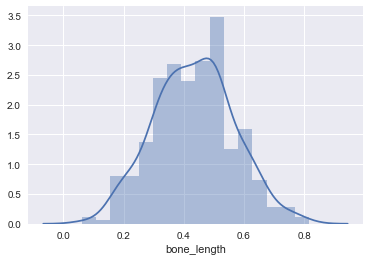

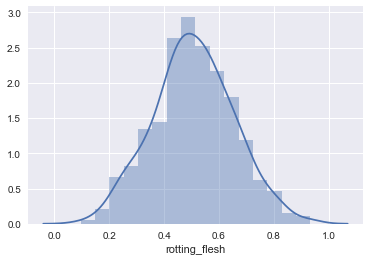

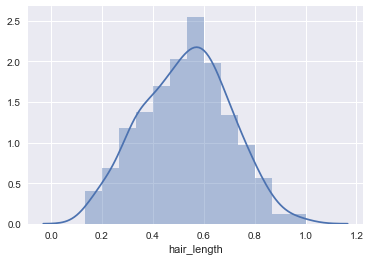

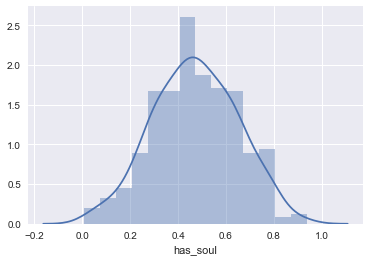

In [14]:
for col in train_df.drop(columns=['id','color','type'],axis=1).columns:
    sns.distplot(train_df[col])
    plt.show()

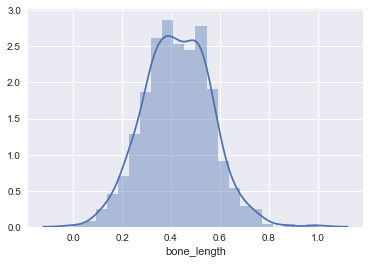

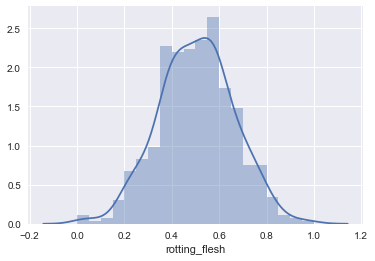

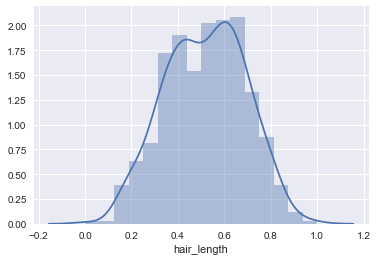

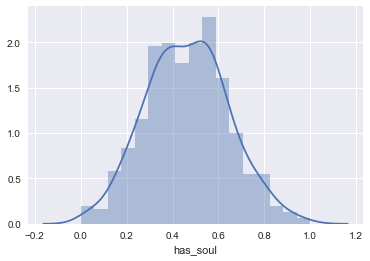

In [15]:
for col in test_df.drop(columns=['id','color'],axis=1).columns:
    sns.distplot(test_df[col])
    plt.show()

In [16]:
train_df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [17]:
test_df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


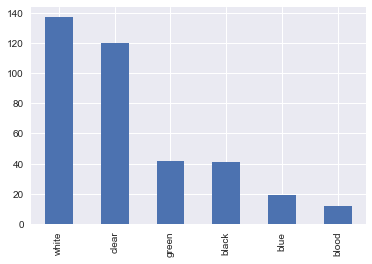

In [18]:
train_df.color.value_counts().plot(kind='bar')

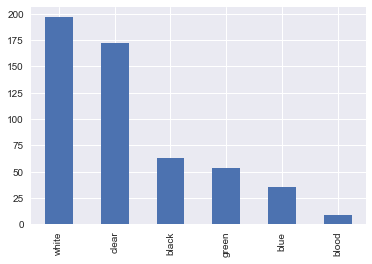

In [19]:
test_df.color.value_counts().plot(kind='bar')

In [20]:
train_data = train_df.drop(columns=['id'],axis=1)

In [21]:
train_data.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [22]:
test_data = test_df.drop(columns=['id'])

In [23]:
test_data.head()

,bone_length,rotting_flesh,hair_length,has_soul,color
0,0.471774,0.387937,0.706087,0.698537,black
1,0.427332,0.645024,0.565558,0.451462,white
2,0.549602,0.491931,0.660387,0.449809,black
3,0.638095,0.682867,0.471409,0.356924,white
4,0.361762,0.583997,0.377256,0.276364,black


In [24]:
train_data.type.value_counts()

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64

In [25]:
le = LabelEncoder()
train_data['type'] = le.fit_transform(train_data['type'])
print(train_data.type.value_counts())

1    129
2    125
0    117
Name: type, dtype: int64


In [26]:
train_data_x = train_data.drop(columns=['type'],axis=1)
train_data_y = train_data['type'].values

In [27]:
train_data_x = pd.get_dummies(train_data_x,columns=['color'],drop_first=True).values

In [28]:
y_data = pd.get_dummies(test_data, columns=['color'], drop_first=True).values

In [29]:
print(train_data_x)

[[0.35451218 0.35083903 0.46576089 ... 1.         0.         0.        ]
 [0.57555991 0.42586843 0.53140138 ... 0.         1.         0.        ]
 [0.4678755  0.35433042 0.81161609 ... 0.         0.         0.        ]
 ...
 [0.48163973 0.50114712 0.49644625 ... 1.         0.         0.        ]
 [0.29494295 0.77128616 0.58350254 ... 1.         0.         0.        ]
 [0.67019954 0.76846867 0.73727435 ... 0.         0.         1.        ]]


In [30]:
print(y_data)

[[0.47177445 0.38793706 0.70608662 ... 0.         0.         0.        ]
 [0.42733226 0.64502359 0.56555791 ... 0.         0.         1.        ]
 [0.54960189 0.49193055 0.66038749 ... 0.         0.         0.        ]
 ...
 [0.5104974  0.49834745 0.70801992 ... 0.         0.         1.        ]
 [0.33147215 0.76583456 0.33820665 ... 1.         0.         0.        ]
 [0.25678919 0.69180244 0.41519681 ... 0.         0.         1.        ]]


In [31]:
params = {'C':[0.001, 0.01, 1, 10, 100, 500, 1000, 2000], 'tol': [0.0001, 0.001, 0.005]}
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
log_clf = GridSearchCV(log_reg, params, refit='True', n_jobs=-1, cv=10)
log_clf.fit(train_data_x, train_data_y)
## C=1, tol=0.0001 로 best param을 찾음

C:\Users\LG\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='newton-cg',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 1, 10, 100, 500, 1000, 2000],
                         'tol': [0.0001, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit='True', return_train_score=False,
             scoring=None, verbose=0)

In [82]:
log_y_pred=log_clf.predict(y_data)
submission['type']=log_y_pred

In [83]:
submission['type'] = submission.type.map({0:"Ghost", 1:"Ghoul", 2:"Goblin"})

In [84]:
submission.to_csv('C:/Users/LG/Desktop/ML_Study(회기)/log_submission.csv', index=False)

In [32]:
params = {'n_estimators':[10,100,1000,2000], 'max_features': [2,3,4,5],'bootstrap':[False]}
rfclf = RandomForestClassifier(n_estimators=10)
rf_clf = GridSearchCV(rfclf, params, refit='True', n_jobs=-1, cv=10)
rf_clf.fit(train_data_x, train_data_y)

C:\Users\LG\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [65]:
DTC = DecisionTreeClassifier(random_state = 42, max_features = "auto", class_weight = "balanced",max_depth = None)
ada_clf = AdaBoostClassifier(base_estimator = DTC)
ada_clf.fit(train_data_x,train_data_y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=42,
                    

In [77]:
params = [ {'n_estimators': [10,100,1000],
'learning_rate':[0.01,0.1,1], 'max_depth': [2,3,4],
'min_samples_split': [3]},
]

gb_clf = GridSearchCV(GradientBoostingClassifier(),
param_grid=params, cv=5, n_jobs=-1)

In [78]:
gb_clf.fit(train_data_x,train_data_y)

C:\Users\LG\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [79]:
gb_y_pred=gb_clf.predict(y_data)
submission['type']=gb_y_pred

In [80]:
submission['type'] = submission.type.map({0:"Ghost", 1:"Ghoul", 2:"Goblin"})

In [81]:
submission.to_csv('C:/Users/LG/Desktop/ML_Study(회기)/gb_submission.csv', index=False)

In [59]:
voting_clf=VotingClassifier(estimators=[('rf',rf_clf),('lr',log_clf),('ada',ada_clf)],voting='soft')
voting_clf.fit(train_data_x,train_data_y)

C:\Users\LG\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\LG\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


VotingClassifier(estimators=[('rf',
                              GridSearchCV(cv=10,
                                           error_score='raise-deprecating',
                                           estimator=RandomForestClassifier(bootstrap=True,
                                                                            class_weight=None,
                                                                            criterion='gini',
                                                                            max_depth=None,
                                                                            max_features='auto',
                                                                            max_leaf_nodes=None,
                                                                            min_impurity_decrease=0.0,
                                                                            min_impurity_split=None,
                                                                   

In [60]:
voting_y_pred=voting_clf.predict(y_data)
submission['type']=voting_y_pred

In [61]:
submission['type'] = submission.type.map({0:"Ghost", 1:"Ghoul", 2:"Goblin"})

In [64]:
submission.to_csv('C:/Users/LG/Desktop/ML_Study(회기)/voting_submission.csv', index=False)

In [40]:
rf_clf.best_params_

{'bootstrap': False, 'max_features': 3, 'n_estimators': 2000}

In [39]:
y_pred = rf_clf.predict(y_data)
submission['type'] = y_pred

In [40]:
submission['type'] = submission.type.map({0:"Ghost", 1:"Ghoul", 2:"Goblin"})

In [41]:
submission.to_csv('C:/Users/HOME/Desktop/머신러닝/submission.csv', index=False)